In [278]:
import os
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from climate_indices import indices, compute


ERA5_DATA = rf"Z:\WB Data\ERA5 Reanalysis\monthly"
PATH = "Z:\Laboral\World Bank\CLIENT v2"
DATA_RAW = rf"{PATH}\Data\Data_raw"
DATA_PROC = rf"{PATH}\Data\Data_proc"
DATA_OUT = rf"{PATH}\Data\Data_out"

## Indicators:
- SPI (monthly data)
- Excessive Rain (monthly data)
- Heat waves (dialy data)
- Cold waves (dialy data)
- Floods (floods data)
- Hurricanes (hurricanes data)

# Monthly data: SPI / Excessive Rain

In [2]:
print("Loading ERA5 raw data...")
files = os.listdir(ERA5_DATA)
datasets = []
for file in tqdm(files):
    ds = xr.open_dataset(os.path.join(ERA5_DATA, file))
    datasets += [ds]
precipitation = xr.concat(datasets, dim="time")
precipitation.to_netcdf(os.path.join(DATA_OUT, "ERA5_monthly_1970-2021.nc"))

precipitation = xr.open_dataset(os.path.join(DATA_OUT, "ERA5_monthly_1970-2021.nc"))

Loading ERA5 raw data...


  0%|          | 0/51 [00:00<?, ?it/s]c:\Users\ofici\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
100%|██████████| 51/51 [00:06<00:00,  7.59it/s]


In [ ]:
### Running this takes... A lot. Aprox. 90m for each SPI, so ~7.5h for all SPIs.

## Script based on: https://github.com/monocongo/climate_indices/issues/326
## Original paper: https://www.droughtmanagement.info/literature/AMS_Relationship_Drought_Frequency_Duration_Time_Scales_1993.pdf
## User guide to SPI: https://digitalcommons.unl.edu/cgi/viewcontent.cgi?article=1208&context=droughtfacpub
#   It is recommended to use SPI-9 or SPI-12 to compute droughts.
#   "SPI values below -1.5 for these timescales (SPI-9) are usually a good indication that dryness is having a significant impact on
#    agriculture and may be affecting other sectors as well."
## More here: https://www.researchgate.net/profile/Sorin-Cheval/publication/264467702_Spatiotemporal_variability_of_the_meteorological_drought_in_Romania_using_the_Standardized_Precipitation_Index_SPI/links/5842d18a08ae2d21756372f8/Spatiotemporal-variability-of-the-meteorological-drought-in-Romania-using-the-Standardized-Precipitation-Index-SPI.pdf
## Ignore negative values, they are normal: https://confluence.ecmwf.int/display/UDOC/Why+are+there+sometimes+small+negative+precipitation+accumulations+-+ecCodes+GRIB+FAQ

# Mask data
precipitation = precipitation.where(mask)
da_precip_groupby = precipitation["tp"].stack(point=("lat", "lon")).groupby("point")

# Parameters
distribution = indices.Distribution.gamma
data_start_year = 1970
calibration_year_initial = 1970
calibration_year_final = 2020
periodicity = compute.Periodicity.monthly

# apply SPI to each `point`
spis = []
for i in [1, 3, 6, 12, 24]:
    print(f"Computing SPI-{i}")
    spi_path = os.path.join(DATA_OUT, f"ERA5_monthly_1970-2021_SPI{i}.nc")
    if os.path.exists(spi_path):
        da_spi = xr.open_dataset(
            spi_path, chunks={"time": 12, "latitude": 500, "longitude": 500}
        )
        print(f"SPI-{i} already computed. Skipping...")
    else:
        da_spi = xr.apply_ufunc(
            indices.spi,
            da_precip_groupby,
            i,
            distribution,
            data_start_year,
            calibration_year_initial,
            calibration_year_final,
            periodicity,
        )
        da_spi = da_spi.unstack("point").rename(f"spi{i}")
        da_spi.to_netcdf(spi_path)
    spis += [da_spi]


In [ ]:
### Running this takes... A lot. Aprox. 90m for each SPI, so ~7.5h for all SPIs.

## Script based on: https://github.com/monocongo/climate_indices/issues/326
## Original paper: https://www.droughtmanagement.info/literature/AMS_Relationship_Drought_Frequency_Duration_Time_Scales_1993.pdf
## User guide to SPI: https://digitalcommons.unl.edu/cgi/viewcontent.cgi?article=1208&context=droughtfacpub
#   It is recommended to use SPI-9 or SPI-12 to compute droughts.
#   "SPI values below -1.5 for these timescales (SPI-9) are usually a good indication that dryness is having a significant impact on
#    agriculture and may be affecting other sectors as well."
## More here: https://www.researchgate.net/profile/Sorin-Cheval/publication/264467702_Spatiotemporal_variability_of_the_meteorological_drought_in_Romania_using_the_Standardized_Precipitation_Index_SPI/links/5842d18a08ae2d21756372f8/Spatiotemporal-variability-of-the-meteorological-drought-in-Romania-using-the-Standardized-Precipitation-Index-SPI.pdf
## Ignore negative values, they are normal: https://confluence.ecmwf.int/display/UDOC/Why+are+there+sometimes+small+negative+precipitation+accumulations+-+ecCodes+GRIB+FAQ

# Mask data
precipitation = precipitation.where(mask)
da_precip_groupby = precipitation["tp"].stack(point=("lat", "lon")).groupby("point")

# Parameters
distribution = indices.Distribution.gamma
data_start_year = 1970
calibration_year_initial = 1970
calibration_year_final = 2020
periodicity = compute.Periodicity.monthly

# apply SPI to each `point`
spis = []
for i in [1, 3, 6, 12, 24]:
    print(f"Computing SPI-{i}")
    spi_path = os.path.join(DATA_OUT, f"ERA5_monthly_1970-2021_SPI{i}.nc")
    if os.path.exists(spi_path):
        da_spi = xr.open_dataset(
            spi_path, chunks={"time": 12, "latitude": 500, "longitude": 500}
        )
        print(f"SPI-{i} already computed. Skipping...")
    else:
        da_spi = xr.apply_ufunc(
            indices.spi,
            da_precip_groupby,
            i,
            distribution,
            data_start_year,
            calibration_year_initial,
            calibration_year_final,
            periodicity,
        )
        da_spi = da_spi.unstack("point").rename(f"spi{i}")
        da_spi.to_netcdf(spi_path)
    spis += [da_spi]


## Compute SPEI

### 1) Compute PET

In [270]:
# Select: 111.621094,-47.872144,181.582031,-10.660608

test_ds = xr.open_dataset(os.path.join(DATA_OUT, "ERA5_monthly_1970-2021.nc"), chunks={"latitude": 500, "longitude": 500})
test_ds = test_ds.sel(latitude=slice(-10.660608, -47.872144), longitude=slice(111.621094, 181.582031))
test_ds["t2m"] = test_ds["t2m"] - 273.15

In [272]:
# Define the PET function to be vectorized
def compute_pet(t2m, lat, year):
    t2m_copy = np.copy(t2m)  # Make a writable copy of t2m
    return indices.pet(t2m_copy, lat, year)

# Vectorized application of the compute_pet function
pet_data = xr.apply_ufunc(
    compute_pet,
    test_ds.t2m,
    test_ds.latitude,
    1970,
    vectorize=True,
    input_core_dims=[['time'], [], []],
    output_core_dims=[['time']],
    dask='parallelized',  # Enable Dask for parallel execution, if using Dask arrays
    output_dtypes=[test_ds.t2m.dtype]
)

test_ds["pet"] = pet_data

### 2) Compute SPEI

In [273]:
# Parameters
distribution = indices.Distribution.gamma
data_start_year = 1970
calibration_year_initial = 1970
calibration_year_final = 2020
periodicity = compute.Periodicity.monthly

for i in [1, 3, 6, 12, 24]:
    print(f"Computing SPI-{i}")
    spi_path = os.path.join(DATA_OUT, f"ERA5_monthly_1970-2021_SPI{i}.nc")
    if os.path.exists(spi_path):
        continue
    else:
        da_spei = xr.apply_ufunc(
            indices.spei,
            test_ds.tp,
            test_ds.pet,
            i,
            distribution,
            periodicity,
            data_start_year,
            calibration_year_initial,
            calibration_year_final,
            vectorize=True,
            input_core_dims=[['time'], ['time'], [], [], [], [], [], []],
            output_core_dims=[['time']],
            dask='parallelized',  # Enable Dask for parallel execution, if using Dask arrays
            output_dtypes=[test_ds.t2m.dtype]
        )


In [281]:
def pet_wrapper(t2m, lat, year):
    t2m_copy = np.copy(t2m)  # Make a writable copy of t2m
    return indices.pet(t2m_copy, lat, year)

ds = xr.open_dataset(
    os.path.join(DATA_PROC, "ERA5_monthly_1970-2021_noPET.nc"),
    chunks={"latitude": 500, "longitude": 500},
)
# Remove -90 and 90 bounds, it produces errors in the PET calculation
ds = ds.sel(latitude=slice(89.9, -89.9))
# ds = ds.where(mask)
ds = ds.sel(
    latitude=slice(-10.660608, -47.872144), longitude=slice(111.621094, 181.582031)
)
ds["t2m"] = ds["t2m"] - 273.15

with ProgressBar():
    ds["PET"] = xr.apply_ufunc(
        pet_wrapper,
        ds.t2m,
        ds.latitude,
        1970,
        vectorize=True,
        input_core_dims=[["time"], [], []],
        output_core_dims=[["time"]],
        dask="parallelized",  # Enable Dask for parallel execution, if using Dask arrays
        output_dtypes=[ds.t2m.dtype],
    )

In [282]:
ds

<xarray.Dataset> Size: 1GB
Dimensions:    (time: 612, latitude: 149, longitude: 280)
Coordinates:
  * longitude  (longitude) float32 1kB 111.8 112.0 112.2 ... 181.0 181.2 181.5
  * latitude   (latitude) float32 596B -10.75 -11.0 -11.25 ... -47.5 -47.75
  * time       (time) datetime64[ns] 5kB 1970-01-01 1970-02-01 ... 2020-12-01
Data variables:
    d2m        (time, latitude, longitude) float64 204MB dask.array<chunksize=(612, 97, 53), meta=np.ndarray>
    t2m        (time, latitude, longitude) float64 204MB dask.array<chunksize=(612, 97, 53), meta=np.ndarray>
    sp         (time, latitude, longitude) float64 204MB dask.array<chunksize=(612, 97, 53), meta=np.ndarray>
    tp         (time, latitude, longitude) float64 204MB dask.array<chunksize=(612, 97, 53), meta=np.ndarray>
    PET        (latitude, longitude, time) float64 204MB dask.array<chunksize=(97, 53, 612), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-05-13 20:50:35 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [2]:
import xarray as xr
xr.open_dataset(r"Z:\Laboral\World Bank\CLIENT v2\Data\Data_out\ERA5_monthly_1970-2021_SPI-SPEI.nc")

c:\Users\ofici\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset> Size: 76GB
Dimensions:    (time: 612, latitude: 719, longitude: 1440)
Coordinates:
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 3kB 89.75 89.5 89.25 ... -89.25 -89.5 -89.75
  * time       (time) datetime64[ns] 5kB 1970-01-01 1970-02-01 ... 2020-12-01
Data variables: (12/15)
    d2m        (time, latitude, longitude) float64 5GB ...
    t2m        (time, latitude, longitude) float64 5GB ...
    sp         (time, latitude, longitude) float64 5GB ...
    tp         (time, latitude, longitude) float64 5GB ...
    PET        (latitude, longitude, time) float64 5GB ...
    SPI-1      (latitude, longitude, time) float64 5GB ...
    ...         ...
    SPI-6      (latitude, longitude, time) float64 5GB ...
    SPEI-6     (latitude, longitude, time) float64 5GB ...
    SPI-12     (latitude, longitude, time) float64 5GB ...
    SPEI-12    (latitude, longitude, time) float64 5GB ...
    SPI-24     (latitude, longitude, time) float64 5GB ...
    SPEI-24    (latitude, longitude, time) float64 5GB ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-05-13 20:50:35 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

[                                        ] | 0% Completed |  0.0s

[########################################] | 100% Completed |  2min 26.9s


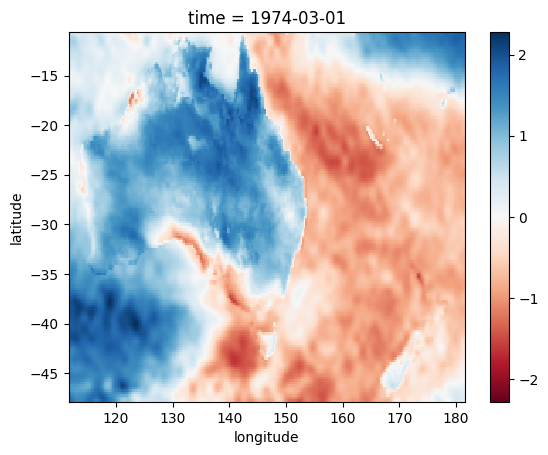

In [274]:
from dask.diagnostics import ProgressBar

with ProgressBar():
    da_spei = da_spei.compute()
da_spei.isel(time=50).plot(cmap="RdBu")